# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful
Scikit-Learn Library


What w're going to cover:

0. An end-toend Scikit-Learn workflow
1. Getting the data ready
2. Chose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get the data ready
# Standart imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
heartdisease = pd.read_csv("heart-disease.csv")
heartdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
x = heartdisease.drop("target", axis=1) #(x = heartdisease without target)

# Create y (labels)
y = heartdisease["target"] #(y =  target column)

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# This function separates all data as test and training; A test size of 0.2 means that eighty percent of the data will be used for training

In [5]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [6]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [7]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [8]:
clf.score(x_test,y_test)

0.7704918032786885

In [9]:
from sklearn.metrics import classification_report,  confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[22, 11],
       [ 3, 25]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [12]:
# 5. Improve a model
# Try different amount  of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Triying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test)*100:.2f}")
    print("")

Triying model with 10 estimators...
Model accuracy on test set: 77.05

Triying model with 20 estimators...
Model accuracy on test set: 77.05

Triying model with 30 estimators...
Model accuracy on test set: 80.33

Triying model with 40 estimators...
Model accuracy on test set: 78.69

Triying model with 50 estimators...
Model accuracy on test set: 75.41

Triying model with 60 estimators...
Model accuracy on test set: 78.69

Triying model with 70 estimators...
Model accuracy on test set: 78.69

Triying model with 80 estimators...
Model accuracy on test set: 75.41

Triying model with 90 estimators...
Model accuracy on test set: 77.05



In [13]:
# Save a model and load it
import pickle
pickle.dump(clf, open("random_forst_model_1.pk1","wb"))

In [14]:
loaded_model = pickle.load(open("random_forst_model_1.pk1", "rb"))
loaded_model.score(x_test,y_test)

0.7704918032786885

## 1. Getting our data ready to be used with machine learning
Three main things we have to do:

     1. Split the data into features and labels (ussually 'X' & 'y')
     
     2. Filling (also called imputing ) or disregarding missing values
     
     3. Converting non-numerical values to numerical values (also called feature encoding)
        

In [15]:
heartdisease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
x = heartdisease.drop("target", axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y = heartdisease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [18]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
xtrain, x_test, ytrain, y_test = train_test_split(x,y, test_size =0.2)

In [19]:
xtrain.shape, x_test.shape, ytrain.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [20]:
x.shape

(303, 13)

### 1.1 Make sure it's all numerical


In [21]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sales)

1000

In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# Split into X/y
x= car_sales.drop("Price", axis=1)
y= car_sales["Price"]

# Split into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [25]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)
#the following error is an expected result, ignore it :)

ValueError: could not convert string to float: 'Toyota'

In [26]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
model.score(x_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [31]:
# Import car sales missing data
carsalesmissing =pd.read_csv("car-sales-extended-missing-data.csv")

In [32]:
carsalesmissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
# Create x & y
x = carsalesmissing.drop("Price", axis=1)
y = carsalesmissing["Price"]

In [34]:
#(In older versions we were supposed to get an error after running this cell)
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1:  Fill missing data with Pandas

In [35]:
# Fill the "Make column"
carsalesmissing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
carsalesmissing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column
carsalesmissing["Odometer (KM)"].fillna(carsalesmissing["Odometer (KM)"].mean, inplace=True)

# Fill the "Odometer" column
carsalesmissing["Doors"].fillna(4, inplace=True)


In [36]:
# Check our dataframe again
carsalesmissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
# Remove rows with missing Price value
carsalesmissing.dropna(inplace=True)

In [38]:
carsalesmissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
len(carsalesmissing)

950

## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
    * Sklearn refers to machine learning models, algorithms as estimators
    
    * Classification problem- predicting a category (heart disease or not)
    
    * Sometimes you'll see 'clf' (short for classfier) used as a classsification estimator
    
    * Regression problem - predicting a number (selling price of a car)
    
If you're working on a machine learning problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn  machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.

In [40]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [41]:
housingdf = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housingdf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
housingdf["target"] = housing["target"]
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [43]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

# Create the data
x = housingdf.drop("target",axis=1)
y = housingdf["target"] # median house price in $100,000s

# Split into train ad test sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(xtrain,ytrain)

# Check the score of the model (on the test set)
model.score(xtest, ytest)

0.5758549611440126

 What if `Ridge` didn't work or the score didn't fit our needs?
    
 Well, we could alwways try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions
                                   than just a single model)?

In [44]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup  random seed
np.random.seed(42)

# Create the data
x= housingdf.drop("target", axis=1)
y = housingdf["target"]

#Split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

# Check the score of the model (on the test set)
model.score(xtest, ytest)

0.8065734772187598

## 2.2 Picking a machine learning model for a classification problem

In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [46]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [48]:
# Import the LinearSVC  estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(xtrain,ytrain)

# Evaluate the LinearSVC
clf.score(xtest,ytest)

C:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [49]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [50]:
# Import RandomForestClassifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)

# Evaluate the RandomForestClassifier
clf.score(xtest,ytest)

0.8524590163934426

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `x` = features, features variables, data
* `y` = labels, targets, target variables

In [51]:
# Import RandomForestClassifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()
# Fit the model to the data (training the machine learning model)
clf.fit(xtrain,ytrain)

# Evaluate the RandomForestClassifier (use the patterns the model has learned)
clf.score(xtest,ytest)

0.8524590163934426

In [52]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [53]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model 

2 ways to make predictions:
1. `predict()`
2 `predict_proba()`

In [54]:
# Use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4])) # this doesn't work

C:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:
pd.DataFrame(clf.predict(xtest))


,0
0,0
1,1
2,1
3,0
4,1
...,...
56,0
57,1
58,0
59,0


In [56]:
pd.DataFrame(ytest)

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [57]:
# Compare predictions to truth labels to evaluate the model
ypreds = clf.predict(xtest)
np.mean(ypreds == ytest)

0.8524590163934426

In [58]:
clf.score(xtest,ytest)

0.8524590163934426

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypreds)

0.8524590163934426

In [60]:
# Make predictions with predict_proba()
# predict_proba() reutns probabilities of a classification label
clf.predict_proba(xtest[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [61]:
# Let's predict() on the same data
clf.predict(xtest[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()`can also be used for regression models.

In [62]:
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housingdf.drop("target", axis=1)
y = housingdf["target"]

# Split into training and test sets
xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=0.2)

# Create model instance
model = RandomForestRegressor()

# Fit the model to the data
model.fit(xtrain,ytrain)

# Make predictions
ypreds= model.predict(xtest)


In [64]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypreds)

0.32659871732073664

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions
    
You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `score` method

In [65]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Import RandomForestClassifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
# Fit the model to the data (training the machine learning model)
clf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=1000)

In [66]:
# The highest value for the .score() method is 1.0, the lowest is 0.0
clf.score(xtrain,ytrain)

1.0

In [67]:
clf.score(xtest,ytest)

0.8688524590163934

### 4.2 Evaluating a model using the `Scoring` parameter

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Import RandomForestClassifier  estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
# Fit the model to the data (training the machine learning model)
clf.fit(xtrain,ytrain);

In [73]:
clf.score(xtest,ytest)

0.8688524590163934

In [74]:
cross_val_score(clf, x, y,cv=10)

array([0.87096774, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.76666667, 0.76666667, 0.83333333, 0.73333333, 0.83333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
heartdisease = pd.read_csv("heart-disease.csv")

x = heartdisease.drop("target", axis=1)
y = heartdisease["target"]

clf = RandomForestClassifier()
cross_val_score(clf,x,y, cv=5).mean()

0.8248087431693989

In [77]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score(clf,x,y,cv=5))*100:.2f}%")

Heart Disease Classifier Cross Validated Accuracy: 81.17%


**Area under the receiver operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* Roc curve

Roc curves are a comparison of a model's true positive rate (tpr) versus a models false psitive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 1 when truth is 1


In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [79]:
from sklearn.metrics import roc_curve
clf.fit(xtrain,ytrain)

# Make predictions with proabilities
yprobs = clf.predict_proba(xtest)
yprobspositive = yprobs[:,1]
yprobspositive

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75, 0.5 ,
       0.79, 0.03, 0.49, 0.77, 0.98, 0.13, 0.74, 0.55, 0.33, 0.95, 0.  ,
       0.89, 0.81, 1.  , 0.83, 0.72, 0.43, 0.96, 0.13, 0.48, 0.47, 0.53,
       0.08, 0.62, 0.87, 0.77, 0.88, 0.42, 0.64, 0.85, 0.94, 0.29, 0.95,
       0.47, 0.89, 0.26, 0.93, 0.07, 0.3 , 0.29, 0.27, 0.85, 0.61, 0.93,
       0.67, 0.02, 0.97, 0.69, 0.18, 0.73])

In [80]:
# Calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(ytest, yprobspositive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.30434783, 0.34782609, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.56521739, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.7826087 , 1.        ])

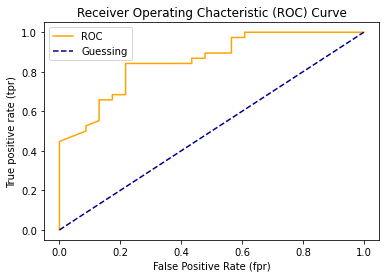

In [81]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate tpr of a model.
    """
    #Plot roc curve
    plt.plot(fpr,tpr, color = "orange", label = "ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label="Guessing")
    

    # Customize the plot 
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Chacteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
    
plot_roc_curve(fpr,tpr)

In [82]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprobspositive)

0.8552631578947368

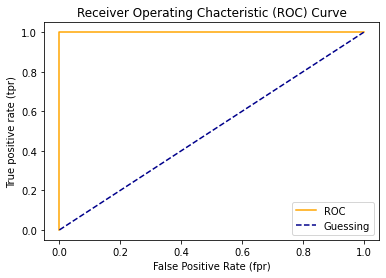

In [83]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(ytest,ytest)
plot_roc_curve(fpr,tpr)

In [84]:
# Perfect AUC score
roc_auc_score(ytest,ytest)

1.0

**Confusion Matrix**

The next way to evaluate a classification model is by using a confisusion matrix

A confusion matrix is a qucik way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

Documentation is here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [85]:
from sklearn.metrics import confusion_matrix

ypreds = clf.predict(xtest)
confusion_matrix(ytest,ypreds)

array([[18,  5],
       [ 7, 31]], dtype=int64)

In [86]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(ytest,ypreds,rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,18,5
1,7,31


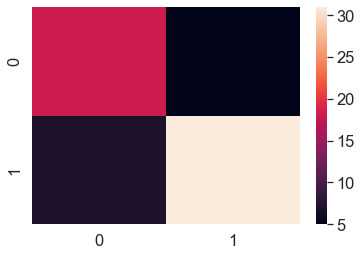

In [87]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
confmat = confusion_matrix(ytest,ypreds)

# Plot it using Seaborn
sns.heatmap(confmat);

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn you will need sklearn version 1.0+

In [88]:
import sklearn 
sklearn.__version__

'1.0.2'

In [89]:
clf

RandomForestClassifier()

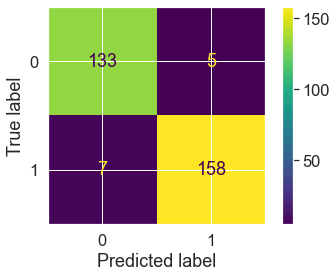

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

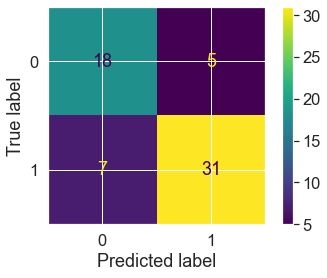

In [91]:
ConfusionMatrixDisplay.from_predictions(y_true=ytest, y_pred=ypreds);

**Classification Report**

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



In [94]:
# Where precision and recall become valuable
diseasetrue = np.zeros(10000)
diseasetrue[0] = 1 # only one positive case

diseasepreds = np.zeros(10000) #model predicts every case as 0

pd.DataFrame(classification_report(diseasetrue,diseasepreds,output_dict=True))

C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [95]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers, it's R^2 value would be 1.

In [96]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housingdf.drop("target", axis=1)
y = housingdf["target"]

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(xtrain,ytrain)



RandomForestRegressor()

In [97]:
model.score(xtest, ytest)

0.8065734772187598

In [98]:
housingdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
ytest.mean()

2.0550030959302275

In [101]:
from sklearn.metrics import r2_score

# Fill an array with ytest mean

ytestmean= np.full(len(ytest),ytest.mean())


In [102]:
ytestmean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [103]:
r2_score(y_true = ytest, y_pred=ytestmean)

0.0

In [104]:
r2_score(y_true=ytest, y_pred=ytest)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are

In [106]:
# MAE

from sklearn.metrics import mean_absolute_error

ypreds = model.predict(xtest)
mae = mean_absolute_error(ytest, ypreds)
mae

0.32659871732073664

In [107]:
df = pd.DataFrame(data = {"Actual Values": ytest, "Predicted values": ypreds})
df["differencess"] = df["Predicted values"] - df["Actual Values"]
df.head(10)

,Actual Values,Predicted values,differencess
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [109]:
# MAE using formules and differences
np.abs(df["differencess"]).mean()

0.32659871732073803

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values.


In [112]:
# Mean squared error

from sklearn.metrics import mean_squared_error

ypreds = model.predict(xtest)
mse = mean_squared_error(ytest, ypreds)
mse

0.2534678520824551

In [117]:
df["squared_differencess"] = np.square(df["differencess"])
df.head()

,Actual Values,Predicted values,differencess,squared_differencess
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [118]:
# Calculate MSE by hand
squared = np.square(df["differencess"])
squared.mean()

0.25346785208245565

 ### 4.2.3 Finally using the `Scoring` parameter

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)


In [124]:
np.random.seed(42)

# Cross-validation accuracy

cvacc= cross_val_score(clf,x,y, cv=100, scoring=None) #if scoring=none, estimators' default scoring evaulation metric is used(accuracy for classification models)
cvacc.mean()

0.8183333333333335

In [125]:
# Cross-validated accuracy


print(f"The cross-validated accuracy is: {np.mean(cvacc)*100:.2f}%")

The cross-validated accuracy is: 81.83%


In [129]:
cvacc= cross_val_score(clf,x,y, cv=5, scoring="accuracy")

print(f"The cross-validated accuracy is: {np.mean(cvacc)*100:.2f}%")

The cross-validated accuracy is: 81.16%


In [131]:
# Precision 
cvprecision = cross_val_score(clf,x,y,cv=5,scoring="precision")
cvprecision.mean()

0.8102655677655678

In [133]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cvprecision)*100:.2f}%")

The cross-validated precision is: 81.03%


In [135]:
# Recall
np.random.seed(42)
cvrecall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cvrecall.mean()

0.8545454545454545

In [136]:
# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cvrecall)*100:.2f}%")

The cross-validated recall is: 85.45%


Let's see the `Scoring` parameter being using for a regression problem...

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housingdf.drop("target", axis=1)
y = housing["target"]
model = RandomForestRegressor(n_estimators=100)

In [139]:
np.random.seed(42)
cvr2 = cross_val_score(model, x, y, cv=3, scoring=None)
np.mean(cvr2)

0.6545458023124507

In [140]:
cvr2

array([0.62156985, 0.72075819, 0.62130937])

In [143]:
# Mean squared error

cvmse = cross_val_score(model, x,y,cv = 3, scoring="neg_mean_squared_error")
np.mean(cvmse)

-0.4626304189468596

In [144]:
# Mean absolute error

cvmae = cross_val_score(model,x,y,cv=3,scoring = "neg_mean_absolute_error")
np.mean(cvmae)

-0.4820330437306202

## 4.3 Using different evaluation metrics as Scikit-Learn Functions

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create x&y
x= heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(xtrain,ytrain)

# Make predictions
ypreds = clf.predict(xtest)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")

print(f"Accuracy: {accuracy_score(ytest,ypreds)*100:.2f}%")
print(f"Precision: {precision_score(ytest,ypreds)*100:.2f}%")
print(f"Recall: {recall_score(ytest,ypreds)*100:.2f}%")
print(f"F1: {f1_score(ytest,ypreds)*100:.2f}%")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


In [154]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create x&y
x= housingdf.drop("target", axis=1)
y = housingdf["target"]

# Split data
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.2)

# Create model
model= RandomForestRegressor()

# Fit model
model.fit(xtrain,ytrain)

# Make predictions
ypreds = model.predict(xtest)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(ytest,ypreds)*100:.2f}")
print(f"MAE: {mean_absolute_error(ytest,ypreds)*100:.2f}")
print(f"MSE: {mean_squared_error(ytest,ypreds)*100:.2f}")

Regression metrics on the test set
R2 score: 80.66
MAE: 32.66
MSE: 25.35


## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From amodel perspective:

* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCv
3. Exhaustively with GridSearchCv

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [157]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Get more info for parameters: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test.


In [158]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [176]:
def evaluate_preds(ytrue, ypreds):
    """"
    Performs evaluation comparison on ytrue labels vs. ypred labels
    on a classification.
    """
    accuracy = accuracy_score(ytrue, ypreds)
    precision = precision_score(ytrue, ypreds)
    recall = recall_score(ytrue, ypreds)
    f1 = f1_score(ytrue, ypreds)
    metric_dict = { "accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {precision:.2f}")
    print(f"F1 score: {precision:.2f}")
    
    return metric_dict

In [177]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#  Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x&y
x = heart_disease_shuffled.drop("target",axis=1)
y= heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7*len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) # 15% of data
xtrain,ytrain = x[:train_split], y[:train_split]
xvalid, yvalid = x[train_split:valid_split], y[train_split:valid_split]
xtest, ytest = x[valid_split:], y[valid_split:]
clf = RandomForestClassifier()
clf.fit(xtrain,ytrain)


# Make baseline predictions
ypreds = clf.predict(xvalid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(yvalid, ypreds)

Acc: 82.22%
Precision: 0.81
Recall: 0.81
F1 score: 0.81


In [178]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(xtrain,ytrain)

# Make predictions with different hyperparameters
ypreds2 = clf2.predict(xvalid)

# Evaluate the 2nd classifier

clf2_metrics = evaluate_preds(yvalid,ypreds2)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [195]:
clf3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(xtrain,ytrain)
ypreds3 = clf3.predict(xvalid)
clf3_metrics = evaluate_preds(yvalid, ypreds3)

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score: 0.84


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [204]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10 ,20, 30],
       "max_features":["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf":[1,2,4]}
np.random.seed(42)

 

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_sampl

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, 

In [205]:
rsclf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [206]:
# Make predictions with the best hyperparameters
rsypreds = rsclf.predict(xtest)

# Evaluate the predictions
rsmetrics = evaluate_preds(ytest,rsypreds)

Acc: 81.97%
Precision: 0.76
Recall: 0.76
F1 score: 0.76


### 5.3 Hyperparameter tuning with GridSearchCv

In [207]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [208]:
grid2 = { 'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [209]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)
# Split into x & y

x = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gsclf = GridSearchCV(estimator=clf,
                          param_grid=grid2,
                          cv=5,
                          verbose=2)

# Fit the GridSearchCV version of clf
gsclf.fit(xtrain,ytrain);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [210]:
gsclf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [212]:
gsypreds = gsclf.predict(xtest)

# evaluate the predictions
gsmetrics = evaluate_preds(ytest, gsypreds)

Acc: 78.69%
Precision: 0.74
Recall: 0.74
F1 score: 0.74


Let's compare our different models metrics

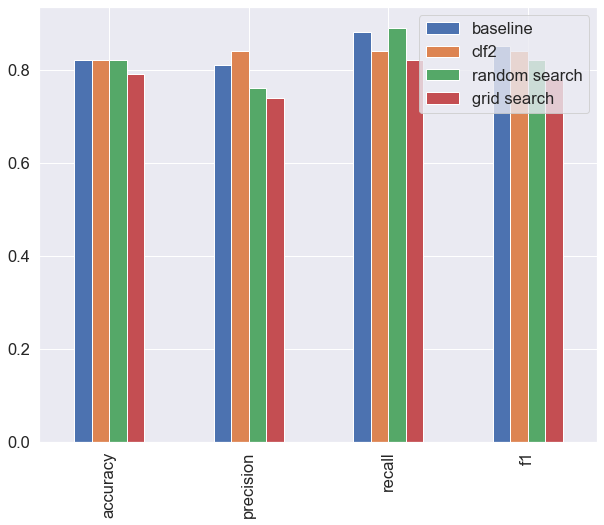

In [216]:
import matplotlib as plt
%matplotlib inline
comparemetrics = pd.DataFrame({"baseline": baseline_metrics,
                              "clf2": clf2_metrics,
                              "random search": rsmetrics,
                              "grid search": gsmetrics})
comparemetrics.plot.bar(figsize=(10,8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Pythons's `Pickle` Module
2. With the `joblib`module

**Pickle**

In [217]:
import pickle

# Save an extisting model to file
pickle.dump(gsclf, open("gs_random_random_fores_model_1.pkl","wb"))

In [218]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_random_fores_model_1.pkl", "rb"))

In [219]:
# Make some predictions
pickleypreds = loaded_pickle_model.predict(xtest)
evaluate_preds(ytest,pickleypreds)

Acc: 78.69%
Precision: 0.74
Recall: 0.74
F1 score: 0.74


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [220]:
from joblib import dump, load

# Save model to file

dump(gsclf, filename="gs_random_Forest_model_1.joblib")


['gs_random_Forest_model_1.joblib']

In [221]:
# Import a saved joblib model
loadedjobmodel = load(filename="gs_random_Forest_model_1.joblib")

In [222]:
# Make and evaluate joblib predictions
joblibypreds = loadedjobmodel.predict(xtest)
evaluate_preds(ytest,joblibypreds)

Acc: 78.69%
Precision: 0.74
Recall: 0.74
F1 score: 0.74


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together!

In [223]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [224]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [226]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data


In [232]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels

data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace =True)

# Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant",fill_value="missing")),
                                          ("onehot",OneHotEncoder(handle_unknown="ignore"))
                                          ])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value=4))
                                  ])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])

# Setup preproccesing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
transformers=[
    ("cat", categorical_transformer, categorical_features),
    ("door", door_transformer, door_feature),
    ("num", numeric_transformer, numeric_features)
])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])
# Split data
x = data.drop("Price", axis=1)
y = data["Price"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# Fit and score the model
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV`with our `Pipeline`.

In [233]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators":[100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split":[2,4]
}
gsmodel = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gsmodel.fit(xtrain,ytrain)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [234]:
gsmodel.score(xtest,ytest)

0.3339554263158365